In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
sns.mpl.rc("figure", figsize=(16, 6))
sns.mpl.rc("font", size=14)

In [7]:
from statsmodels.datasets.danish_data import load
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order
from statsmodels.tsa.api import UECM

In [8]:
xl = pd.ExcelFile('/Users/aslanramazanov/Desktop/Курсовая/data.xlsx')

In [9]:
print(xl.sheet_names)

['Brazil', 'Br', 'Russia', 'Ru', 'China', 'Chi', 'India', 'Africa']


In [10]:
br = xl.parse('Br')
ru = xl.parse('Ru')
chi = xl.parse('Chi')

In [11]:
br = br.drop(columns = ['year', 'month'], axis = 1)
ru = ru.drop(columns = ['year', 'month'], axis = 1)
chi = chi.drop(columns = ['year', 'month'], axis = 1)

In [12]:
br = br.dropna()
ru = ru.dropna()
chi = chi.dropna()

In [13]:
br.head()

,CPI,Interest_rate,Exchange_rate,GPR,Oil_price,US_market,national_market,EPU,VIX
0,5.974593,-1.30,-0.943920,-0.005696,9.205021,-5.090352,-4.146684,-13.339214,0.287356
1,5.922135,0.68,-0.924888,-0.005118,7.279693,-2.010814,7.804015,32.343269,-7.286124
2,6.271204,-1.79,-1.782178,0.007824,-10.714286,9.671990,0.894272,22.741806,10.331126
3,6.440733,1.92,3.629032,-0.009936,-3.600000,-3.079582,-12.509817,93.619461,4.321729
4,6.609964,0.16,1.389661,0.023034,17.842324,-2.191500,-4.033085,-83.095871,-11.008822


In [23]:
sel_res = ardl_select_order(
    chi.national_market, 3, chi[["CPI", "Interest_rate", "Exchange_rate", 'GPR', 'Oil_price', 'US_market','EPU','VIX']], 
    3, ic="aic", trend="c"
)
print(f"The optimal order is: {sel_res.model.ardl_order}")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The optimal order is: (0, 3, 0, 0, 0, 0)


In [15]:
res = sel_res.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARDL Model Results                              
===============================================================================
Dep. Variable:         national_market   No. Observations:                  254
Model:             ARDL(2, 2, 0, 0, 3)   Log Likelihood                -735.812
Method:                Conditional MLE   S.D. of innovations              4.486
Date:                 Wed, 27 Apr 2022   AIC                           1497.624
Time:                         13:43:44   BIC                           1543.506
Sample:                              3   HQIC                          1516.086
                                   254                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9770      0.312      3.131      0.002       0.362       1.592
national_market.L1     0.0238      0.057      0.418      0.676      -0.088       0.136
national_market.L2    -0.1681      0.057     -2.925      0.004      -0.281      -0.055
Interest_rate.L0      -0.7593      0.337     -2.251      0.025      -1.424      -0.095
Interest_rate.L1      -0.7812      0.340     -2.299      0.022      -1.450      -0.112
Interest_rate.L2      -0.7450      0.324     -2.302      0.022      -1.382      -0.108
Exchange_rate.L0      -0.5946      0.073     -8.166      0.000      -0.738      -0.451
Oil_price.L0           0.0513      0.034      1.498      0.136      -0.016       0.119
US_market.L0           0.6531      0.079      8.243      0.000       0.497       0.809
US_market.L1          -0.0688      0.087     -0.789      0.431      -0.241       0.103
US_market.L2           0.0943      0.087      1.089      0.277      -0.076       0.265
US_market.L3          -0.1654      0.065     -2.533      0.012      -0.294      -0.037
======================================================================================
"""

In [62]:
ecm = UECM(chi.national_market, 1, chi[["CPI", "Interest_rate", "Exchange_rate", 'GPR', 'Oil_price', 'US_market','EPU','VIX']], 3, trend="c")
ecm_fit = ecm.fit()
bounds_test = ecm_fit.bounds_test(case=2)
bounds_test

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


BoundsTestResult
Stat: 19.03505
Upper P-value: 0
Lower P-value: 0
Null: No Cointegration
Alternative: Possible Cointegration

In [46]:
res = ARDL(
    chi.national_market, 3, chi[["CPI", "Interest_rate", "Exchange_rate", 
                               'GPR', 'Oil_price', 'US_market','EPU','VIX']], 
    {"CPI":3, "Interest_rate":1, "Exchange_rate":1, 
                               'GPR':1, 'Oil_price':1, 'US_market':1,'EPU':1,'VIX':1}, trend="c"
).fit()
ecm = UECM.from_ardl(res.model)
ecm_res = ecm.fit()
ecm_res.summary()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     UECM Model Results                                    
===========================================================================================
Dep. Variable:                   D.national_market   No. Observations:                  263
Model:             UECM(3, 3, 1, 1, 1, 1, 1, 1, 1)   Log Likelihood                -732.129
Method:                            Conditional MLE   S.D. of innovations              7.152
Date:                             Sun, 24 Apr 2022   AIC                           1510.259
Time:                                     20:17:55   BIC                           1592.155
Sample:                                          3   HQIC                          1543.182
                                               263                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2736      0.294     -0.932      0.352      -0.852       0.305
national_market.L1      -0.9366      0.090    -10.454      0.000      -1.113      -0.760
CPI.L1                   0.1200      0.813      0.148      0.883      -1.481       1.721
Interest_rate.L1        -5.4192      3.688     -1.469      0.143     -12.685       1.847
Exchange_rate.L1        -0.9837      0.434     -2.267      0.024      -1.839      -0.129
GPR.L1                   0.9523      2.416      0.394      0.694      -3.807       5.712
Oil_price.L1             0.0845      0.043      1.963      0.051      -0.000       0.169
US_market.L1             0.7131      0.131      5.436      0.000       0.455       0.971
EPU.L1                  -0.0068      0.006     -1.145      0.253      -0.019       0.005
VIX.L1                   0.0049      0.025      0.195      0.845      -0.045       0.055
D.national_market.L1     0.0322      0.065      0.494      0.622      -0.096       0.161
D.national_market.L2     0.0066      0.046      0.141      0.888      -0.085       0.098
D.CPI.L0                -0.4585      0.459     -0.999      0.319      -1.363       0.446
D.CPI.L1                -0.0470      0.623     -0.075      0.940      -1.275       1.181
D.CPI.L2                 0.8667      0.452      1.916      0.057      -0.025       1.758
D.Interest_rate.L0      -5.3760      2.675     -2.010      0.046     -10.645      -0.107
D.Exchange_rate.L0      -0.9196      0.357     -2.573      0.011      -1.624      -0.215
D.GPR.L0                 0.8614      1.467      0.587      0.558      -2.028       3.751
D.Oil_price.L0           0.0682      0.031      2.182      0.030       0.007       0.130
D.US_market.L0           0.8199      0.088      9.344      0.000       0.647       0.993
D.EPU.L0                -0.0025      0.004     -0.701      0.484      -0.010       0.005
D.VIX.L0                -0.0054      0.016     -0.331      0.741      -0.037       0.027
========================================================================================
"""

In [16]:
#residuals estimation 
qq = sel_res.model.fit()
params = qq.params
fitted = sel_res.model.predict(params)

residuals = fitted - chi.national_market
residuals = residuals.dropna()
print(residuals)


3      7.262952
4      4.388274
5     -8.303282
6      4.719143
7     -0.177931
         ...   
249   -2.456881
250   -2.515145
251   -3.509255
252   -0.964998
253    3.090016
Length: 251, dtype: float64


In [17]:
#residuals' acf plot
import statsmodels.api as sm

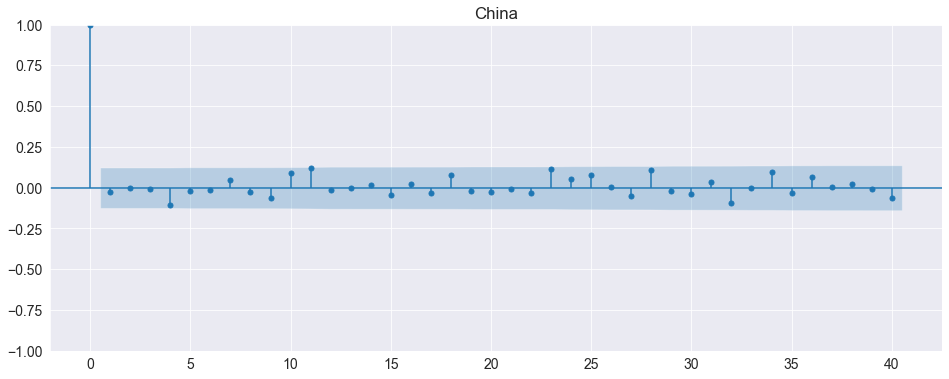

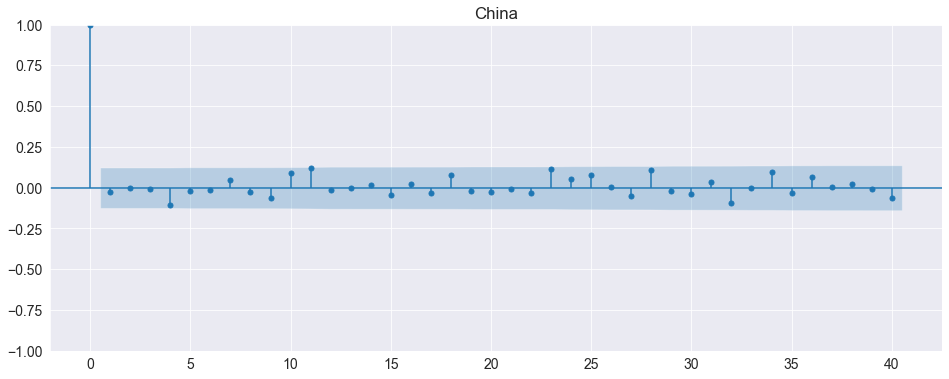

In [24]:
sm.graphics.tsa.plot_acf(residuals, lags=40, title='China')

In [19]:
import statsmodels.stats.diagnostic as sd

In [20]:
#RESET test

reset = sd.linear_reset(sel_res.model.fit())
print(reset.pvalue)

TypeError: result must come from a linear regression model

In [22]:
#Lagrange multiplier test

predictors = ["CPI", "Interest_rate", "Exchange_rate", 
                               'GPR', 'Oil_price', 'US_market','EPU','VIX','disequilibrium']

lagrange = sd.linear_lm(residuals,predictors ) #change country for residuals



TypeError: list indices must be integers or slices, not tuple

In [41]:
#ecm estimation
ru['disequilibrium'] = residuals
ru.disequilibrium = ru.disequilibrium.shift(1)

In [ ]:
ru_copy = ru
for i in ["CPI", "Interest_rate", "Exchange_rate", 
                               'GPR', 'Oil_price', 'US_market','EPU','VIX']:
    ru_copy[i] = ru_copy[i].diff()
ru_copy = ru_copy.dropna()
predictors = ["CPI", "Interest_rate", "Exchange_rate", 
                               'GPR', 'Oil_price', 'US_market','EPU','VIX','disequilibrium']
ec_model = sm.OLS(ru_copy.national_market, ru_copy[predictors])
ec_model_fit = ec_model.fit()
print(ec_model_fit.summary())

In [31]:
#Granger's causality test

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):  
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(chi, variables = chi.columns)  

KeyboardInterrupt: 

In [69]:
#Johansen's test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(chi)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CPI    ::  537.3     > 179.5199  =>   True
Interest_rate ::  429.13    > 143.6691  =>   True
Exchange_rate ::  327.07    > 111.7797  =>   True
GPR    ::  233.27    > 83.9383   =>   True
Oil_price ::  170.54    > 60.0627   =>   True
US_market ::  109.14    > 40.1749   =>   True
national_market ::  67.82     > 24.2761   =>   True
EPU    ::  32.96     > 12.3212   =>   True
VIX    ::  12.56     > 4.1296    =>   True
